In [1]:
import numpy as np
arr=np.array([[1,0,1],[-2,-3,1],[3,3,0]])
#rank of this matrix is 2
#total no of linearly independent rows

In [2]:
import tensorflow as tf

In [3]:
session=tf.InteractiveSession()
x=tf.constant(list(range(10)))

In [4]:
print(x.eval())

[0 1 2 3 4 5 6 7 8 9]


In [5]:
session.close()

In [6]:
import numpy as np
x1=tf.constant(np.array([1,2,3,4]))
x2=tf.constant(np.array([5,6,7,8]))
result=tf.multiply(x1,x2)
print(result)

sess=tf.Session()
print(sess.run(result))

Tensor("Mul:0", shape=(4,), dtype=int32)
[ 5 12 21 32]


In [7]:
#Write with different method
x1=tf.constant(np.array([[1,2,3,4],[5,6,7,8]]))
x2=tf.constant(np.array([[4,5,2,1],[9,3,2,1]]))
result=tf.multiply(x1,x2)
with tf.Session() as sess:
    output=sess.run(result)
    print(output)

[[ 4 10  6  4]
 [45 18 14  8]]


In [8]:
a=tf.constant(6,name='a')
b=tf.constant(8,name='b')
add=a+b
with tf.Session() as sess:
    output=sess.run(add)
    print(output)

14


In [9]:
#global_variables_initializer initializes the value of 42 to variable
variable = tf.Variable(42, name='foo')
initialize = tf.global_variables_initializer()
assign = variable.assign(13)

In [10]:
with tf.Session() as sess:
    sess.run(initialize)
    sess.run(assign)
    print(sess.run(variable))

13


The value of our variable is only valid within one session. If we try to query the value afterwards in a second session, TensorFlow will raise an error because the variable is not initialized there.

we can use the graph in more than one session, we just have to initialize the variables again. The values in the new session will be completely independent from the first one:

In [11]:
with tf.Session() as sess:
        sess.run(initialize)
        print(sess.run(variable))

42


In [12]:
import tensorflow as tf

x = tf.constant(35, name='x1')
y = tf.Variable(x + 5, name='y1')

#print(y.op)
with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("log_simple_graph", session.graph)
    model =  tf.global_variables_initializer()
    session.run(model)
    print(session.run(y))

40


In [13]:

import tensorflow as tf

a = tf.add(1, 2,)
b = tf.multiply(a, 3)
c = tf.add(4, 5,)
d = tf.multiply(c, 6,)
e = tf.multiply(4, 5,)
f = tf.div(c, 6,)
g = tf.add(b, d)
h = tf.multiply(g, f)

with tf.Session() as sess:
    print(sess.run(h))

63


In [14]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("output", sess.graph)
    print(sess.run(h))
    writer.close()

63


In [15]:
#tensorboard --logdir .\output\
h.op

<tf.Operation 'Mul_5' type=Mul>

In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [17]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
#Then we can implement the cross-entropy function, −∑y′log⁡(y):
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
mnist.train
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    #writer = tf.summary.FileWriter("output", sess.graph)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    #writer.close()
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9179


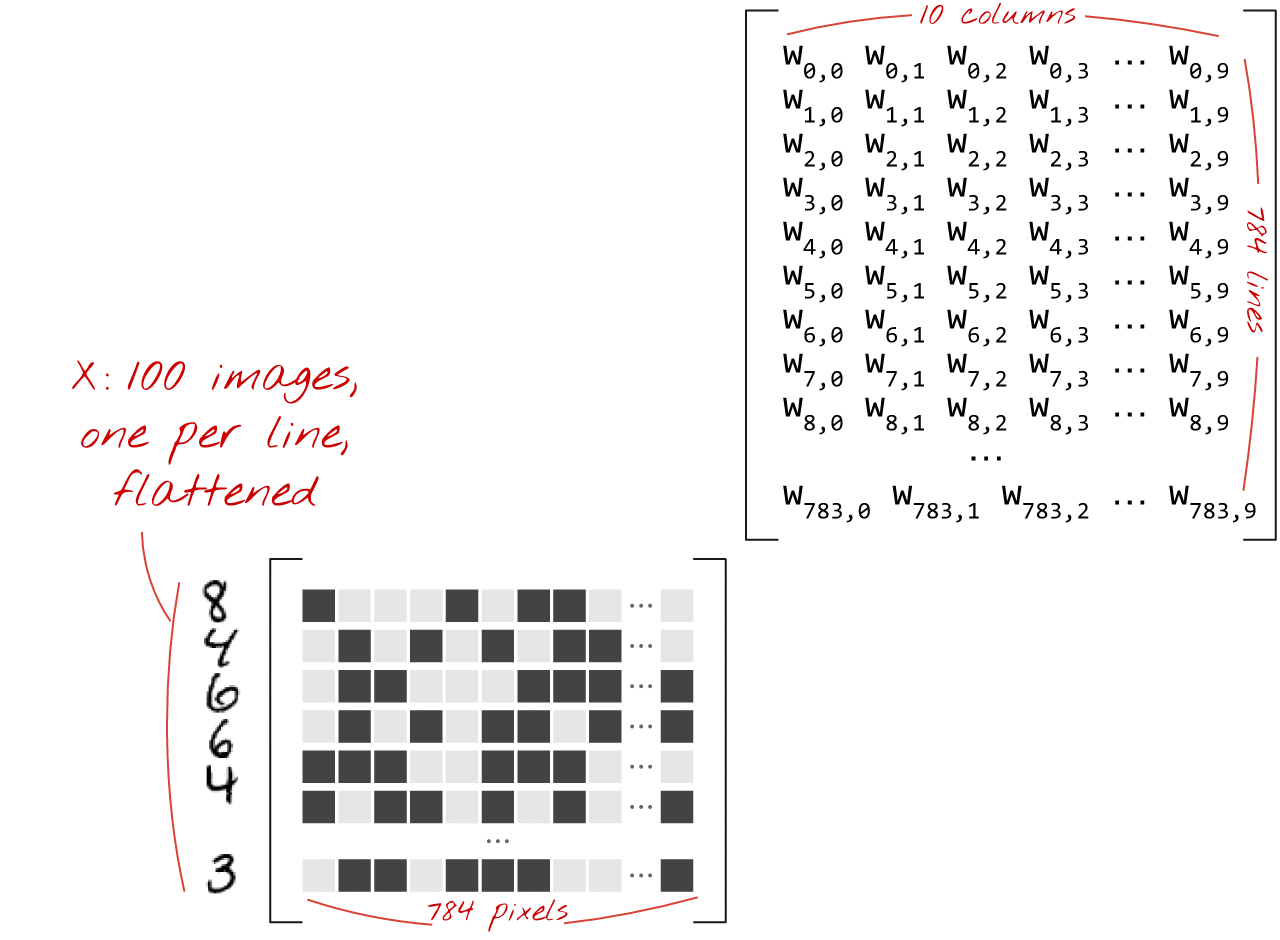

In [18]:
from IPython.display import Image
img1=Image(filename='images/tensorflow.png')
img1

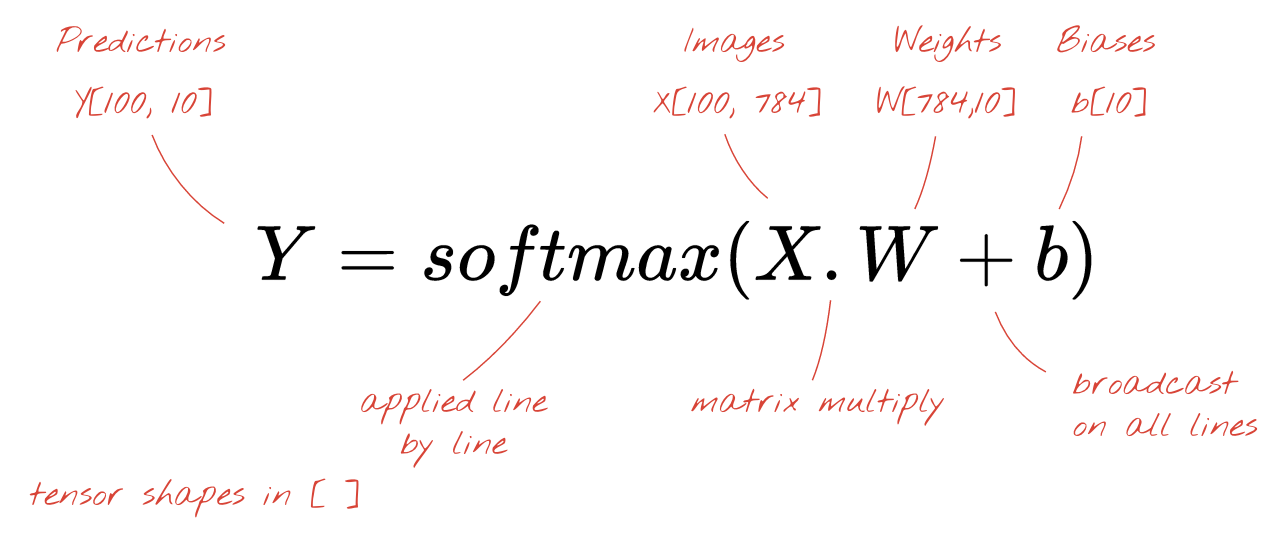

In [19]:
img2=Image(filename='images/T1.png')
img2